## Bitcoin network analysis based on machine learning techniques
Authors:
- Anna Urban
- Dominik Gołębiowski
- Przemysław Herian
- Jan Gąsienica-Józkowy

### Project description 
TODO

### Data download
The data used in this project comes from quandl.com Blockchain dataset. The dataset contains data with daily intervals about The dataset is publicly avaiable on following website:

https://www.quandl.com/data/BCHAIN-Blockchain?fbclid=IwAR27ie_3WGDMChTB94F4T5NdL4onUYziIZGd72a8ABGJLB-zXKWD_zg10OU

In [1]:
!pip install quandl

In [2]:
import quandl
import numpy as np
import pandas as pd

In [3]:
# How bitcoin works: https://www.youtube.com/watch?v=bBC-nXj3Ng4
quandl.ApiConfig.api_key = 'T3ox-1VP3bnyZ6h1dFpb'

In [4]:
# Market Price USD - Average USD market price across major bitcoin exchanges.
btc_market_price = quandl.get("BCHAIN/MKPRU")

In [5]:
# Bitcoin Market Capitalization - The total USD value of bitcoin supply in circulation, as calculated by the daily average market price across major exchanges.
btc_market_cap = quandl.get("BCHAIN/MKTCP")

In [6]:
# Total Bitcoins - The total number of bitcoins that have already been mined; in other words, the current supply of bitcoins on the network.
btc_supply = quandl.get("BCHAIN/TOTBC")

In [7]:
# Blockchain Size - The total size of all block headers and transactions. Not including database indexes.
btc_blockchain_size = quandl.get("BCHAIN/BLCHS")

In [8]:
# Bitcoin Number of Transactions - The number of daily confirmed Bitcoin transactions.
btc_transactions_number = quandl.get("BCHAIN/NTRAN")

In [9]:
# Bitcoin Estimated Transaction Volume - The total estimated value of transactions on the Bitcoin blockchain (does not include coins returned to sender as change).
btc_transaction_volume = quandl.get("BCHAIN/ETRAV")

In [10]:
# Bitcoin Number of Unique Bitcoin Addresses Used - The total number of unique addresses used on the Bitcoin blockchain.
btc_addresses_used = quandl.get("BCHAIN/NADDU")

In [11]:
# Hash rate - Number of combinations guesses per second 
# https://www.youtube.com/watch?v=GgaXmhTC_C0
btc_hash_rate = quandl.get("BCHAIN/HRATE")

In [12]:
# Mining difficulty - A relative measure of how difficult it is to find a new block.
# https://www.youtube.com/watch?v=o1gOyhU6XEw
btc_mining_difficulty = quandl.get("BCHAIN/DIFF")

In [13]:
# Miners Revenue - Total value of coinbase block rewards and transaction fees paid to miners.
# https://www.youtube.com/watch?v=o1gOyhU6XEw
btc_miners_revenue = quandl.get("BCHAIN/MIREV")

In [14]:
# Mining Operating Margin - Data showing miners revenue minus estimated electricity and bandwidth costs.
# btc_mining_operating_margin = quandl.get("BCHAIN/MIOPM")
# Only data to 2016...

In [15]:
# Bitcoin Cost Per Transaction - A chart showing miners revenue divided by the number of transactions.
btc_cost_per_transaction = quandl.get("BCHAIN/CPTRA")

In [16]:
# Bitcoin Total Transaction Fees USD - The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).
btc_transaction_fees = quandl.get("BCHAIN/TRFUS")

In [17]:
# Bitcoin Average Block Size - The average block size in MB.
btc_avg_block_size = quandl.get("BCHAIN/AVBLS")

In [18]:
# Bitcoin Number of Transaction per Block - The average number of transactions per block.
btc_transactions_per_block = quandl.get("BCHAIN/NTRBL")

In [19]:
# Bitcoin Exchange Trade Volume - The total USD value of trading volume on major bitcoin exchanges
btc_transactions_per_block = quandl.get("BCHAIN/NTRBL")

In [27]:
print(btc_market_price.values[:,0].shape)
print(btc_market_cap.values[:,0].shape)
print(btc_supply.values[:,0].shape)
print(btc_blockchain_size.values[:,0].shape)
print(btc_transactions_number.values[:,0].shape)
print(btc_transaction_volume.values[:,0].shape)
print(btc_addresses_used.values[:,0].shape)
print(btc_hash_rate.values[:,0].shape)
print(btc_mining_difficulty.values[:,0].shape)
print(btc_miners_revenue.values[:,0].shape)
print(btc_cost_per_transaction.values[:,0].shape)
print(btc_addresses_used.values[:,0].shape)
print(btc_transaction_fees.values[:,0].shape)
print(btc_mining_difficulty.values[:,0].shape)
print(btc_avg_block_size.values[:,0].shape)
print(btc_transactions_per_block.values[:,0].shape)
print(btc_transactions_per_block.values[:,0].shape)

(4548,)
(4547,)
(4547,)
(4547,)
(4547,)
(4546,)
(4547,)
(4546,)
(4547,)
(4547,)
(4547,)
(4547,)
(4547,)
(4547,)
(4547,)
(4547,)
(4547,)


In [29]:
btc_data = pd.DataFrame(
    {
        "Market Price USD": btc_market_price.values[:-2,0],
        "Market Cap": btc_market_cap.values[:-1,0],
        "Bitcoin Supply": btc_supply.values[:-1,0],
        "Blockchain Size": btc_blockchain_size.values[:-1,0],
        "Daily Number of Transactions": btc_transactions_number.values[:-1,0],
        "Estimated Transaction Volume": btc_transaction_volume.values[:,0],
        "Unique Bitcoin Addresses Used": btc_addresses_used.values[:-1,0],
        "Hash rate": btc_hash_rate.values[:,0],
        "Mining difficulty": btc_mining_difficulty.values[:-1,0],
        "Miners Revenue": btc_miners_revenue.values[:-1,0],
        "Cost Per Transaction": btc_cost_per_transaction.values[:-1,0],
        "Total Transaction Fees USD": btc_transaction_fees.values[:-1,0],
        "Average Block Size": btc_avg_block_size.values[:-1,0],
        "Number of Transaction per Block": btc_transactions_per_block.values[:-1,0],
        "Exchange Trade Volume": btc_transactions_per_block.values[:-1,0],
    },
    index=list(btc_market_cap.index[:-1])
)

In [30]:
btc_data

,Market Price USD,Market Cap,Bitcoin Supply,Blockchain Size,Daily Number of Transactions,Estimated Transaction Volume,Unique Bitcoin Addresses Used,Hash rate,Mining difficulty,Miners Revenue,Cost Per Transaction,Total Transaction Fees USD,Average Block Size,Number of Transaction per Block,Exchange Trade Volume
2009-01-02,0.00,0.000000e+00,50.00,0.000000,1.0,0.000000,1.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000272,1.000000,1.000000
2009-01-03,0.00,0.000000e+00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
2009-01-04,0.00,0.000000e+00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
2009-01-05,0.00,0.000000e+00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
2009-01-06,0.00,0.000000e+00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-09,33450.19,6.809947e+11,18731031.25,349477.103190,210911.0,116051.363365,581779.0,1.234620e+08,2.104773e+13,2.908202e+07,134.170029,1.210337e+06,1.067569,1673.896825,1673.896825
2021-06-10,37338.36,6.773722e+11,18731862.50,349611.985192,252983.0,125318.068673,679752.0,1.098603e+08,2.104773e+13,2.899097e+07,114.596509,1.715939e+06,1.311452,2143.923729,2143.923729
2021-06-11,36704.57,6.983202e+11,18732518.75,349766.420460,216502.0,94723.611050,616007.0,1.381101e+08,2.104773e+13,2.575379e+07,118.954072,1.505579e+06,1.401894,2061.923810,2061.923810
2021-06-12,37313.18,6.714332e+11,18733400.00,349913.530160,222774.0,59967.976659,584529.0,1.367245e+08,2.104773e+13,3.118978e+07,139.888315,1.278938e+06,1.489760,1687.681818,1687.681818


In [31]:
btc_data.describe()

,Market Price USD,Market Cap,Bitcoin Supply,Blockchain Size,Daily Number of Transactions,Estimated Transaction Volume,Unique Bitcoin Addresses Used,Hash rate,Mining difficulty,Miners Revenue,Cost Per Transaction,Total Transaction Fees USD,Average Block Size,Number of Transaction per Block,Exchange Trade Volume
count,4546.000000,4.546000e+03,4.546000e+03,4546.000000,4546.000000,4.546000e+03,4.546000e+03,4.546000e+03,4.546000e+03,4.546000e+03,4546.000000,4.546000e+03,4546.000000,4546.000000,4546.000000
mean,4227.130831,7.609905e+10,1.226071e+07,88756.001710,142809.813462,1.716763e+05,2.762023e+05,2.418165e+07,3.334047e+12,6.391288e+06,27.255028,4.858816e+05,0.515871,961.917973,961.917973
std,9431.154544,1.756098e+11,5.659068e+06,106121.719274,127721.341869,2.174640e+05,2.562189e+05,4.452188e+07,6.167873e+12,1.102177e+07,37.841080,1.562819e+06,0.471192,871.765514,871.765514
min,0.000000,0.000000e+00,5.000000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,6.624742,5.362504e+07,8.329388e+06,793.500000,8018.500000,7.649259e+04,1.698575e+04,1.161898e+01,1.591075e+06,4.813726e+04,4.156888,8.126035e+01,0.023473,53.337001,53.337001
50%,416.280000,5.800608e+09,1.397984e+07,31586.000000,100039.500000,1.470641e+05,2.121520e+05,3.363049e+05,4.742755e+10,1.383753e+06,9.917603,7.650435e+03,0.376607,692.732000,692.732000
75%,6069.705000,1.040824e+11,1.701472e+07,166827.779920,265693.500000,2.299872e+05,4.942010e+05,3.045168e+07,4.022059e+12,9.660944e+06,39.367336,2.069975e+05,0.966305,1825.958333,1825.958333
max,63554.440000,1.185967e+12,1.873406e+07,350110.221082,490644.000000,5.313161e+06,1.072861e+06,1.985140e+08,2.504649e+13,8.017224e+07,300.310549,2.128565e+07,1.499183,2762.540984,2762.540984


In [32]:
btc_data.shape

(4546, 15)

In [33]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4546 entries, 2009-01-02 to 2021-06-13
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Market Price USD                 4546 non-null   float64
 1   Market Cap                       4546 non-null   float64
 2   Bitcoin Supply                   4546 non-null   float64
 3   Blockchain Size                  4546 non-null   float64
 4   Daily Number of Transactions     4546 non-null   float64
 5   Estimated Transaction Volume     4546 non-null   float64
 6   Unique Bitcoin Addresses Used    4546 non-null   float64
 7   Hash rate                        4546 non-null   float64
 8   Mining difficulty                4546 non-null   float64
 9   Miners Revenue                   4546 non-null   float64
 10  Cost Per Transaction             4546 non-null   float64
 11  Total Transaction Fees USD       4546 non-null   float64
 12  Av

<AxesSubplot:>

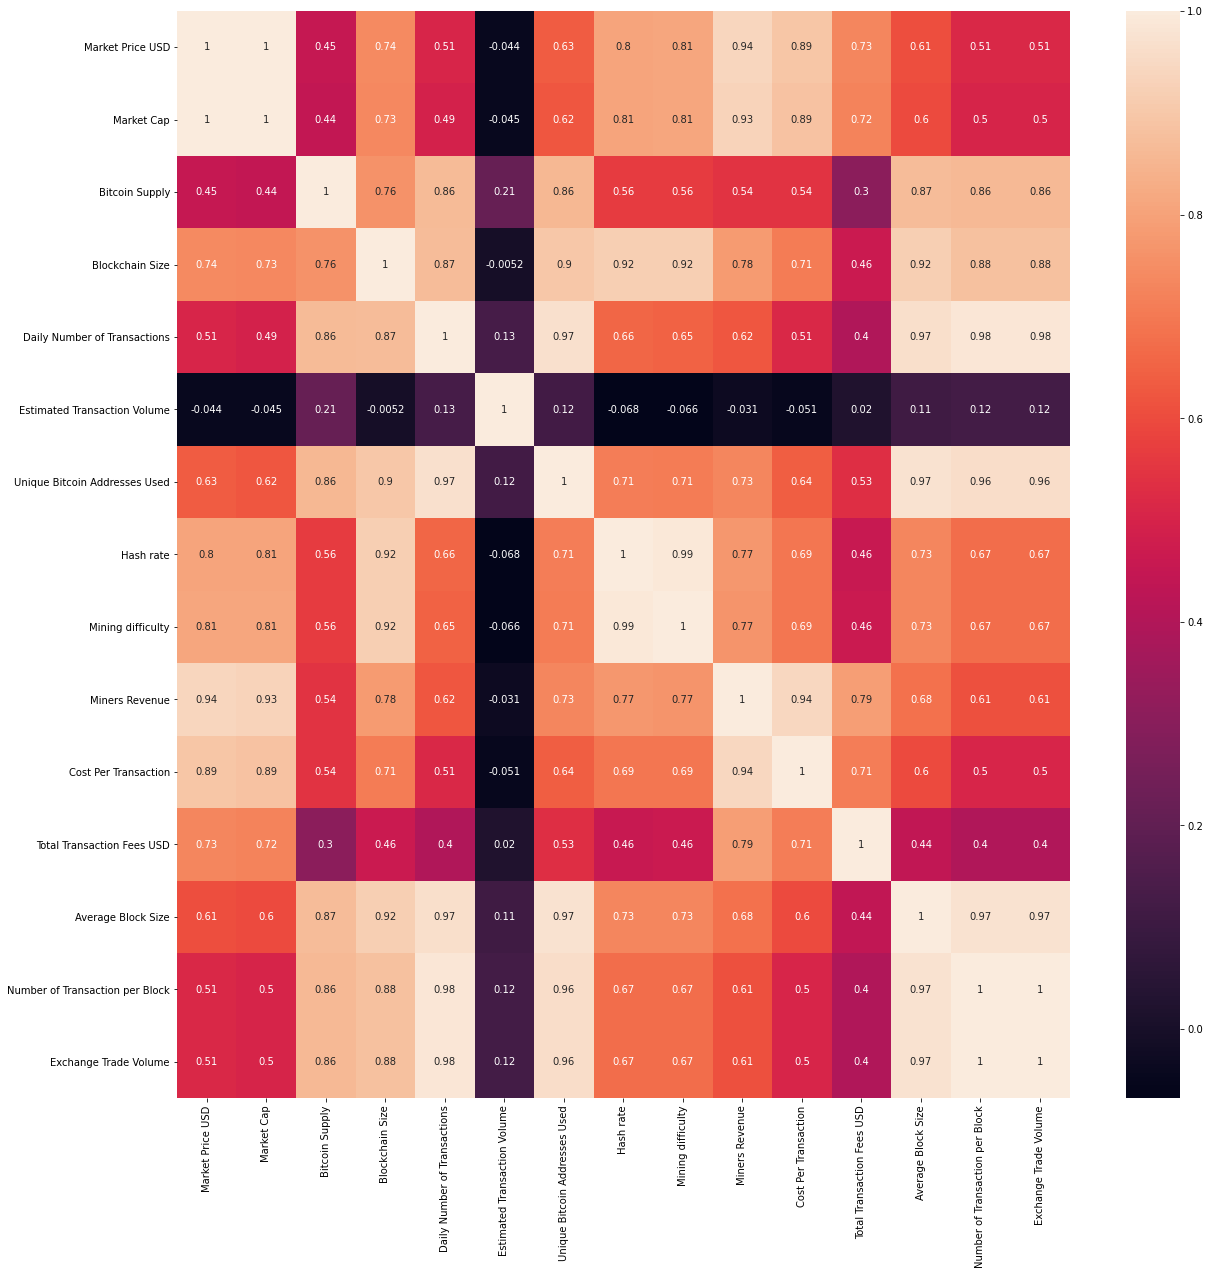

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = btc_data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True)

# Multivariate Linear Regression

Article: https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171


## Data preparation

We will split data into Train and Test dataset. The test dataset will be last 30 days in order to see how well our model would predict recent values.

The goal of this method would be to predict Market Price USD, Hash rate and Blockchain Size based on other parameters.

Add bias and set index to dates

In [35]:
df = pd.concat([pd.Series(1, index=btc_data.index, name='00'), btc_data], axis=1)
df.head()

,00,Market Price USD,Market Cap,Bitcoin Supply,Blockchain Size,Daily Number of Transactions,Estimated Transaction Volume,Unique Bitcoin Addresses Used,Hash rate,Mining difficulty,Miners Revenue,Cost Per Transaction,Total Transaction Fees USD,Average Block Size,Number of Transaction per Block,Exchange Trade Volume
2009-01-02,1,0.0,0.0,50.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000272,1.0,1.0
2009-01-03,1,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0
2009-01-04,1,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0
2009-01-05,1,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0
2009-01-06,1,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0


Set the independent X values and the dependent y for 3 predictions: market price, hash rate, blockchain size.

In [36]:
columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
X = df.drop(columns=columns)
marketprice = df["Market Price USD"]
hashrate = df["Hash rate"]
blockchainsize = df["Blockchain Size"]

Normalize the input variables

In [37]:
for column in X.columns:
    X[column] = X[column]/np.max(X[column])
X

,00,Market Cap,Bitcoin Supply,Daily Number of Transactions,Estimated Transaction Volume,Unique Bitcoin Addresses Used,Mining difficulty,Miners Revenue,Cost Per Transaction,Total Transaction Fees USD,Average Block Size,Number of Transaction per Block,Exchange Trade Volume
2009-01-02,1.0,0.000000,0.000003,0.000002,0.000000,9.320872e-07,3.992576e-14,0.000000,0.000000,0.000000,0.000181,0.000362,0.000362
2009-01-03,1.0,0.000000,0.000003,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000362,0.000362
2009-01-04,1.0,0.000000,0.000003,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000362,0.000362
2009-01-05,1.0,0.000000,0.000003,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000362,0.000362
2009-01-06,1.0,0.000000,0.000003,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000362,0.000362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-09,1.0,0.574210,0.999838,0.429866,0.021842,5.422688e-01,8.403466e-01,0.362744,0.446771,0.056862,0.712101,0.605927,0.605927
2021-06-10,1.0,0.571156,0.999883,0.515614,0.023586,6.335881e-01,8.403466e-01,0.361609,0.381593,0.080615,0.874778,0.776069,0.776069
2021-06-11,1.0,0.588819,0.999918,0.441261,0.017828,5.741722e-01,8.403466e-01,0.321231,0.396104,0.070732,0.935105,0.746387,0.746387
2021-06-12,1.0,0.566148,0.999965,0.454044,0.011287,5.448320e-01,8.403466e-01,0.389035,0.465812,0.060085,0.993714,0.610916,0.610916


Separate for training and test set the independent X values and the dependent y for 3 predictions: market price, hash rate, blockchain size. 

In [38]:
test_len = 30

train_X = X.iloc[:-test_len]
test_X = X.iloc[-test_len:]

train_marketprice = marketprice.iloc[:-test_len]
test_marketprice = marketprice.iloc[-test_len:]
train_hashrate = hashrate.iloc[:-test_len]
test_hashrate = hashrate.iloc[-test_len:]    
train_blockchainsize = blockchainsize.iloc[:-test_len]
test_blockchainsize = blockchainsize.iloc[-test_len:]    

## Training vs Test plot of target value

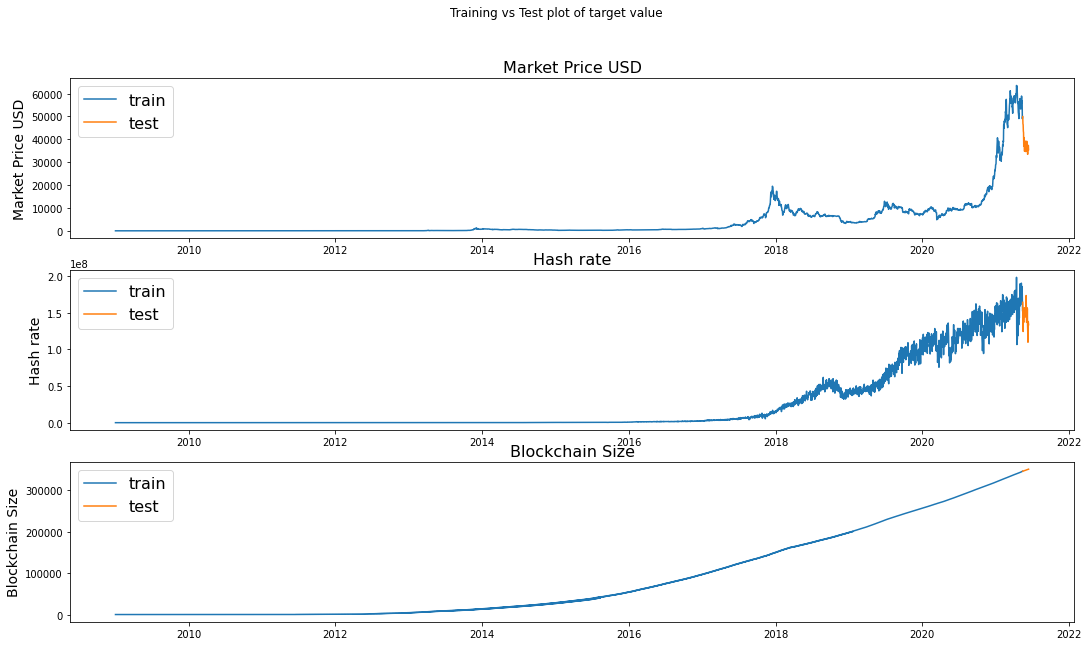

In [57]:
fig, ax = plt.subplots(3, figsize=(18, 10))
fig.suptitle('Training vs Test plot of target value')

columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
training_y = [train_marketprice, train_hashrate, train_blockchainsize]
test_y = [test_marketprice, test_hashrate, test_blockchainsize]

for idx, (column, train_y,test_y) in enumerate(zip(columns, training_y, test_y)):
    ax[idx].plot(train_y, label="train")
    ax[idx].plot(test_y, label="test")
    ax[idx].set_ylabel(column, fontsize=14)
    ax[idx].set_title(column, fontsize=16)
    ax[idx].legend(loc='best', fontsize=16)

Initiate theta values

In [40]:
def initialize_theta():
    theta = np.array([0]*len(train_X.columns))
    return theta
    
theta = initialize_theta()
theta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Define the hypothesis function

In [41]:
def hypothesis(theta, train_X):
    return theta*train_X

Define the cost function

In [42]:
def computeCost(train_X, train_y, theta):
    y1 = hypothesis(theta, train_X)
    y1 = np.sum(y1, axis=1)
    return sum(np.sqrt((y1-train_y)**2))/(2*47)

Write the function for the gradient descent. This function will take X, y, theta, learning rate (alpha), and epochs (iterations) as input. 

Target: Cost function reaches minimum.

In [43]:
def gradientDescent(train_X, train_y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, train_X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(train_X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-train_y)*train_X.iloc[:,c])/len(train_X))
        j = computeCost(train_X, train_y, theta)
        J.append(j)
        k += 1
    return J, j, theta

### Train & predict for Market Price USD

Use the gradient descent function to get the final cost, the list of cost in each iteration, and the optimized parameters theta.

In [44]:
J_marketprice, j_marketprice, theta_marketprice = gradientDescent(train_X, train_marketprice, theta, 0.05, 5000)

Predict the output using the optimized theta

In [45]:
y_hat_marketprice = hypothesis(theta_marketprice, test_X)
y_hat_marketprice = np.sum(y_hat_marketprice, axis=1)

Initialize back theta values for next prediction

In [46]:
theta = initialize_theta()
theta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Train & predict for Hash Rate

In [47]:
J_hashrate, j_hashrate, theta_hashrate = gradientDescent(train_X, train_hashrate, theta, 0.05, 5000)

In [48]:
y_hat_hashrate = hypothesis(theta_hashrate, test_X)
y_hat_hashrate = np.sum(y_hat_hashrate, axis=1)

In [49]:
theta = initialize_theta()
theta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Train & predict for Blockchain Size

In [50]:
J_blockchainsize, j_blockchainsize, theta_blockchainsize = gradientDescent(train_X, train_blockchainsize, theta, 0.05, 5000)

In [51]:
y_hat_blockchainsize = hypothesis(theta_blockchainsize, test_X)
y_hat_blockchainsize = np.sum(y_hat_blockchainsize, axis=1)

In [52]:
theta = initialize_theta()
theta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Predictions plot

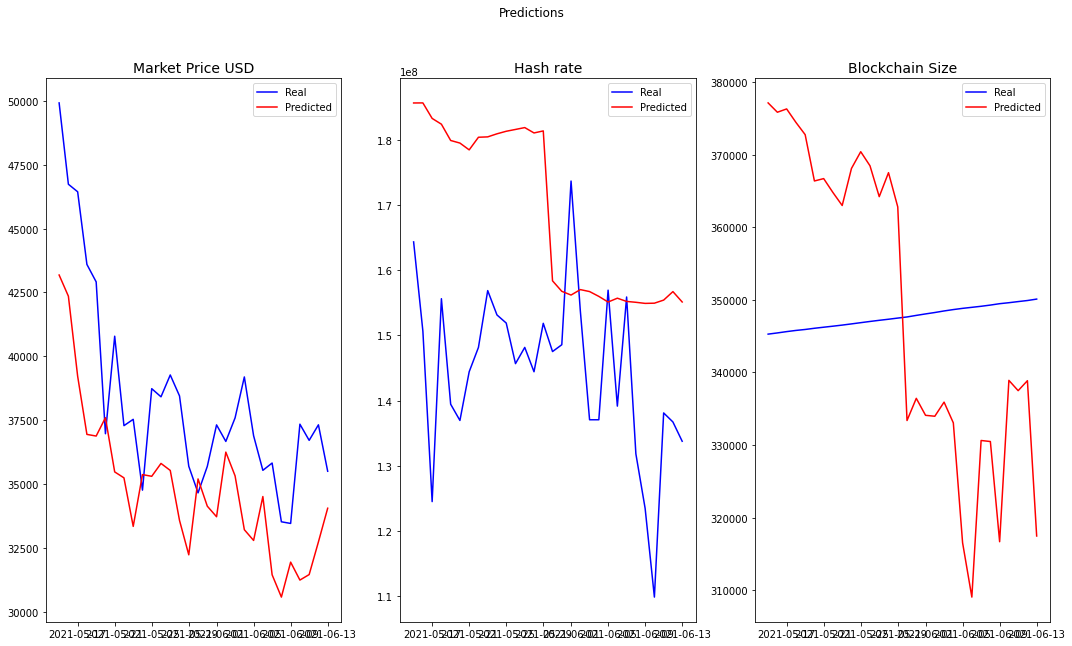

In [58]:
predicted_sets = [y_hat_marketprice, y_hat_hashrate, y_hat_blockchainsize]
test_sets = [test_marketprice, test_hashrate, test_blockchainsize]
column_names = ["Market Price USD", "Hash rate", "Blockchain Size"]

fig, ax = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Predictions')

for idx, (column_name, predicted_set, test_set) in enumerate(zip(column_names, predicted_sets, test_sets)):
    ax[idx].plot(test_set, color='blue', label="Real")         
    ax[idx].plot(predicted_set, color='red', label="Predicted")
    ax[idx].set_title(column_name, fontsize=14)
    ax[idx].legend()

plt.show()

Plot the cost of each iteration to see the behavior

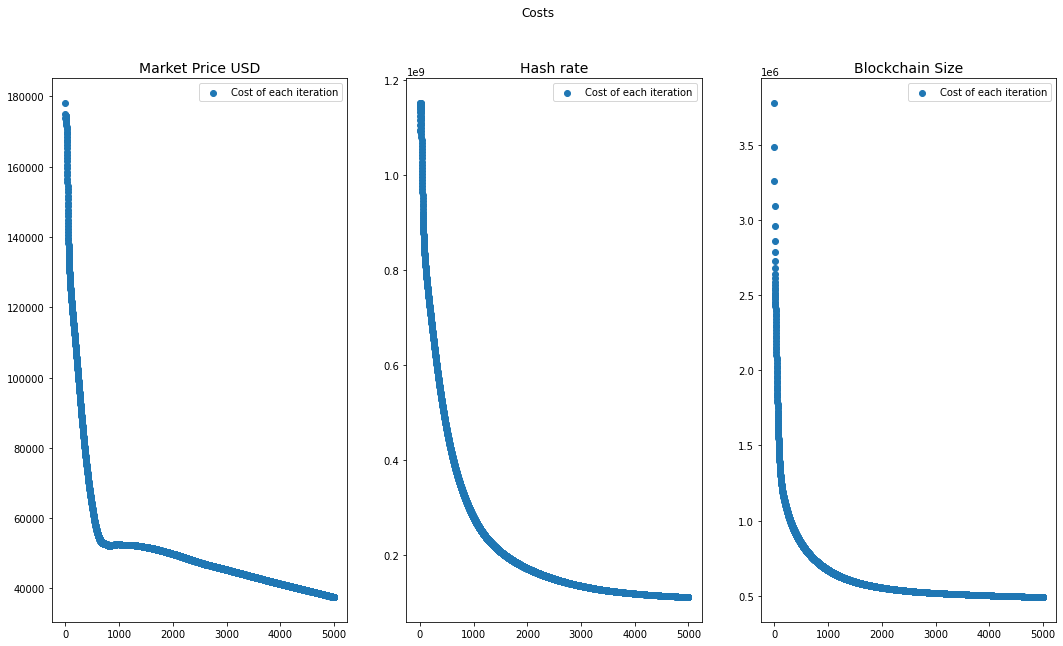

In [59]:
J = [J_marketprice, J_hashrate, J_blockchainsize]

fig, ax = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Costs')

for idx, j, column_name in zip([0, 1, 2], J, column_names):
    ax[idx].scatter(x=list(range(0, 5000)), y=j, label="Cost of each iteration")
    ax[idx].set_title(column_name, fontsize=14)
    ax[idx].legend()

plt.show()

# Multivariate single step MLP prediction
Based on Multilayer Perceptron Models for Time Series Forecasting [article](https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/). 



## Data preparation
We will split data into 3 datasets - training, validating and test. The test dataset will be last 30 days in order to see how well our model would predict recent values. Training and validating dataset will be the rest of data, shufled and splitted randomly.

The goal of this method would be to predict *Market Price USD*, *Hash rate* and *Blockchain Size* based on other parameters.

[$x_{1}$, $x_{2}$...$x_{12}$] -> [$x_{price}$, $x_{hash}$, $x_{blockchain}$] 

In [55]:
from sklearn.model_selection import train_test_split

df = btc_data.copy()

# Split data into X, y
columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
X = df.drop(columns=columns).to_numpy()
y = df.filter(items=columns).to_numpy()

X_size = X.shape[1]
y_size = y.shape[1]

# Data normalization
X_normalization = np.max(X, axis=0)
y_normalization = np.max(y, axis=0)
X = X/X_normalization
y = y/y_normalization

# Set test data as N last days (there is one record per day)
N = 30
X, X_test = X[:-N], X[-N:]
y, y_test = y[:-N], y[-N:]

# Split training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'X train: {X_train.shape}\ny train: {y_train.shape}')
print(f'X val: {X_val.shape}\ny val: {y_val.shape}')
print(f'X test: {X_test.shape}\ny test: {y_test.shape}')

X train: (4064, 12)
y train: (4064, 3)
X val: (452, 12)
y val: (452, 3)
X test: (30, 12)
y test: (30, 3)


# Model definition

In [62]:
# from keras.models import Sequential
# from keras.layers import Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(512, activation='relu', input_dim=X_size))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(y_size))
model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 23,171
Trainable params: 23,171
Non-trainable params: 0
_________________________________________________________________


In [63]:
history1 = model1.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs=200,
    validation_data=(X_val, y_val),
)

Epoch 1/200
127/127 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 5.8870e-04
Epoch 2/200
127/127 [==============================] - 0s 1ms/step - loss: 4.4375e-04 - val_loss: 4.2282e-04
Epoch 3/200
127/127 [==============================] - 0s 1ms/step - loss: 4.2104e-04 - val_loss: 4.5193e-04
Epoch 4/200
127/127 [==============================] - 0s 1ms/step - loss: 3.8544e-04 - val_loss: 3.2608e-04
Epoch 5/200
127/127 [==============================] - 0s 1ms/step - loss: 4.0968e-04 - val_loss: 3.4898e-04
Epoch 6/200
127/127 [==============================] - 0s 1ms/step - loss: 3.4717e-04 - val_loss: 3.6710e-04
Epoch 7/200
127/127 [==============================] - 0s 993us/step - loss: 3.9369e-04 - val_loss: 3.3900e-04
Epoch 8/200
127/127 [==============================] - 0s 1ms/step - loss: 3.2583e-04 - val_loss: 3.7118e-04
Epoch 9/200
127/127 [==============================] - 0s 1ms/step - loss: 3.0401e-04 - val_loss: 3.0445e-04
Epoch 10/200
127/127 

Epoch 149/200
127/127 [==============================] - 0s 1ms/step - loss: 2.1611e-04 - val_loss: 2.0602e-04
Epoch 150/200
127/127 [==============================] - 0s 1ms/step - loss: 2.1661e-04 - val_loss: 2.3108e-04
Epoch 151/200
127/127 [==============================] - 0s 1ms/step - loss: 2.1195e-04 - val_loss: 2.4648e-04
Epoch 152/200
127/127 [==============================] - 0s 1ms/step - loss: 2.3381e-04 - val_loss: 2.1665e-04
Epoch 153/200
127/127 [==============================] - 0s 1ms/step - loss: 1.9955e-04 - val_loss: 2.0582e-04
Epoch 154/200
127/127 [==============================] - 0s 1ms/step - loss: 1.9617e-04 - val_loss: 2.7426e-04
Epoch 155/200
127/127 [==============================] - 0s 1ms/step - loss: 2.1520e-04 - val_loss: 2.6889e-04
Epoch 156/200
127/127 [==============================] - 0s 1ms/step - loss: 2.1682e-04 - val_loss: 2.4077e-04
Epoch 157/200
127/127 [==============================] - 0s 1ms/step - loss: 2.0625e-04 - val_loss: 2.4614e-04
E

In [64]:
y_hat = model1.predict(X_test, verbose=0)

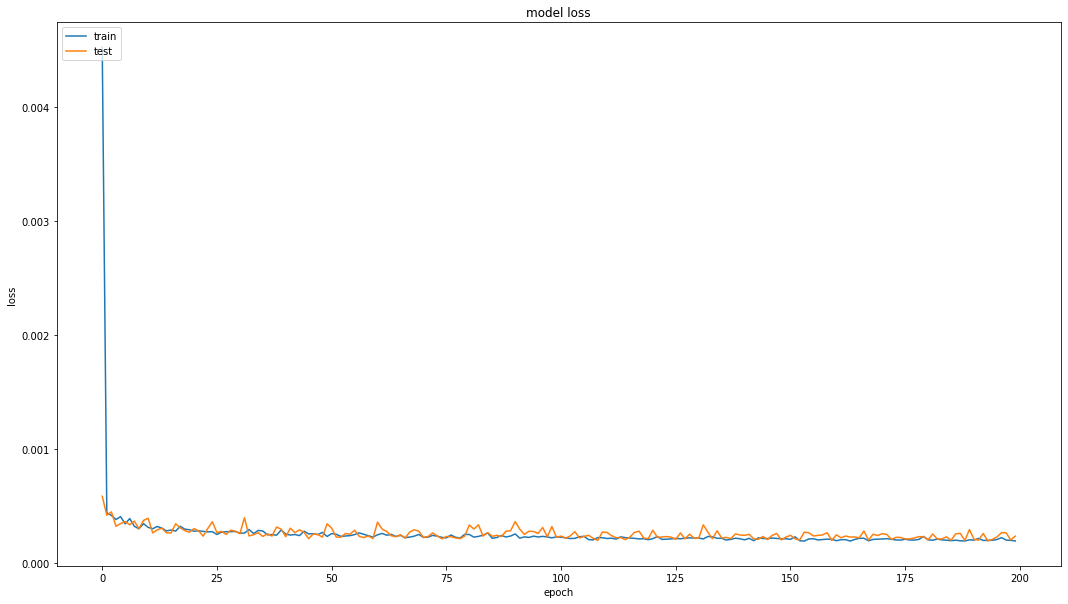

In [66]:
# summarize history for loss
plt.figure(figsize = (18,10))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

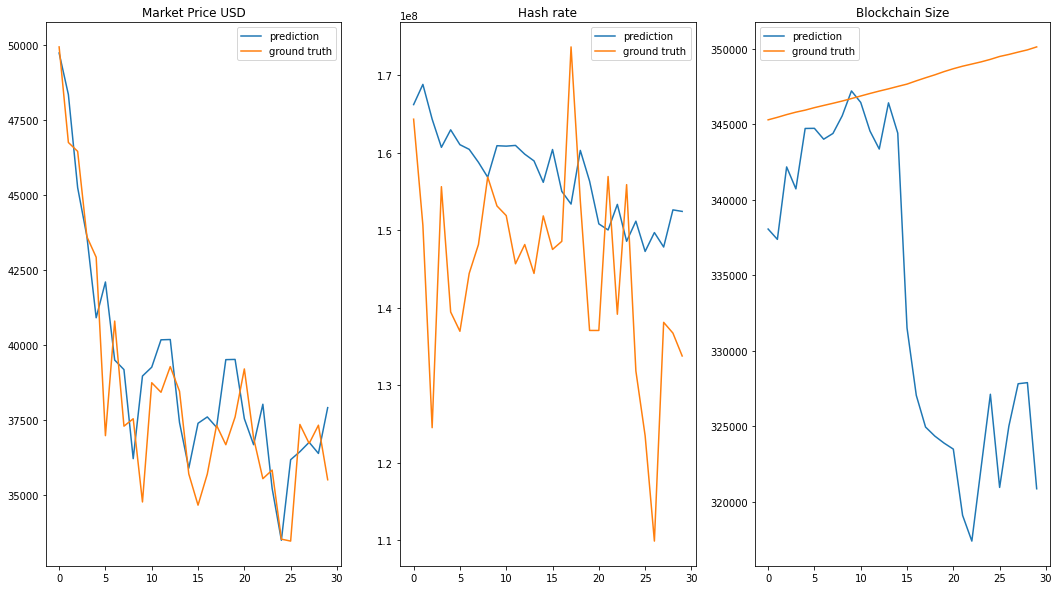

In [68]:
y_hat_p = (y_hat * y_normalization).swapaxes(0,1)
y_test_p = (y_test * y_normalization).swapaxes(0,1) 

fig, axs = plt.subplots(1,y_size, figsize=(18, 10))
for idx, (prediction, ground_truth, label) in enumerate(zip(y_hat_p, y_test_p, columns)):
    axs[idx].plot(prediction, label='prediction')
    axs[idx].plot(ground_truth, label='ground truth')
    axs[idx].set_title(label)
    axs[idx].legend()

plt.show()   

# Multivariate single step MLP prediction with history
In previous example we have only taken into consideration current values of parameters in order to make prediction. In this section we will try to take N steps back in history and make prediction on that. We will also include in X dataset history of predicting values.

The goal of this method would be to predict *Market Price USD*, *Hash rate* and *Blockchain Size* based on N historical values.

$[X_{1}, X_{2}...X_{N}]$ -> $[x_{price}, x_{hash}, x_{blockchain}]$

where 

$[x_{price}, x_{hash}, x_{blockchain}] \subset X_{N+1}$ and $X_{N} = [x_{1}, x_{2}...x_{15}]$

## Data preparation

Helping function that will split dataset to N history packs

In [100]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [101]:
from sklearn.model_selection import train_test_split

df = btc_data.copy()

columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
columns_idx = [df.columns.get_loc(c) for c in columns if c in df]

HISTORY_LENGTH = 32
X = df.to_numpy()
print(f'Dataset shape: {X.shape}')

# Data normalization
X_normalization = np.max(X, axis=0)
y_normalization = X_normalization[columns_idx]
X = X/X_normalization

# Split into X and y
X, y = split_sequences(X, HISTORY_LENGTH)
y = y[:,columns_idx]

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

X_size = X.shape[1]
y_size = y.shape[1]

# Set test data as N last days (there is one record per day)
N = 30
X, X_test = X[:-N], X[-N:]
y, y_test = y[:-N], y[-N:]
# Split training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'X train: {X_train.shape}\ny train: {y_train.shape}')
print(f'X val: {X_val.shape}\ny val: {y_val.shape}')
print(f'X test: {X_test.shape}\ny test: {y_test.shape}')

Dataset shape: (4546, 15)
X train: (4035, 480)
y train: (4035, 3)
X val: (449, 480)
y val: (449, 3)
X test: (30, 480)
y test: (30, 3)


In [102]:
model2 = Sequential()
model2.add(Dense(1024, activation='relu', input_dim=n_input))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(y_size))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              492544    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 387       
Total params: 624,131
Trainable params: 624,131
Non-trainable params: 0
_________________________________________________________________


In [103]:
history2 = model2.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs=100,
    validation_data=(X_val, y_val),
)

Epoch 1/100
127/127 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 5.7262e-04
Epoch 2/100
127/127 [==============================] - 0s 2ms/step - loss: 5.9524e-04 - val_loss: 0.0019
Epoch 3/100
127/127 [==============================] - 0s 2ms/step - loss: 7.9376e-04 - val_loss: 0.0014
Epoch 4/100
127/127 [==============================] - 0s 2ms/step - loss: 6.2223e-04 - val_loss: 4.4662e-04
Epoch 5/100
127/127 [==============================] - 0s 2ms/step - loss: 5.9652e-04 - val_loss: 2.8122e-04
Epoch 6/100
127/127 [==============================] - 0s 2ms/step - loss: 4.5997e-04 - val_loss: 3.2139e-04
Epoch 7/100
127/127 [==============================] - 0s 2ms/step - loss: 5.0716e-04 - val_loss: 0.0013
Epoch 8/100
127/127 [==============================] - 0s 2ms/step - loss: 6.9157e-04 - val_loss: 4.9197e-04
Epoch 9/100
127/127 [==============================] - 0s 2ms/step - loss: 5.0547e-04 - val_loss: 0.0019
Epoch 10/100
127/127 [=================

Epoch 76/100
127/127 [==============================] - 0s 2ms/step - loss: 2.5536e-04 - val_loss: 2.5018e-04
Epoch 77/100
127/127 [==============================] - 0s 2ms/step - loss: 2.5171e-04 - val_loss: 2.9543e-04
Epoch 78/100
127/127 [==============================] - 0s 2ms/step - loss: 2.4963e-04 - val_loss: 1.7370e-04
Epoch 79/100
127/127 [==============================] - 0s 2ms/step - loss: 2.2683e-04 - val_loss: 3.7314e-04
Epoch 80/100
127/127 [==============================] - 0s 2ms/step - loss: 2.8575e-04 - val_loss: 3.4497e-04
Epoch 81/100
127/127 [==============================] - 0s 2ms/step - loss: 2.7502e-04 - val_loss: 2.0936e-04
Epoch 82/100
127/127 [==============================] - 0s 2ms/step - loss: 2.3566e-04 - val_loss: 1.9465e-04
Epoch 83/100
127/127 [==============================] - 0s 2ms/step - loss: 2.4322e-04 - val_loss: 2.4759e-04
Epoch 84/100
127/127 [==============================] - 0s 2ms/step - loss: 2.3541e-04 - val_loss: 4.0014e-04
Epoch 85/1

In [104]:
y_hat = model2.predict(X_test, verbose=0)

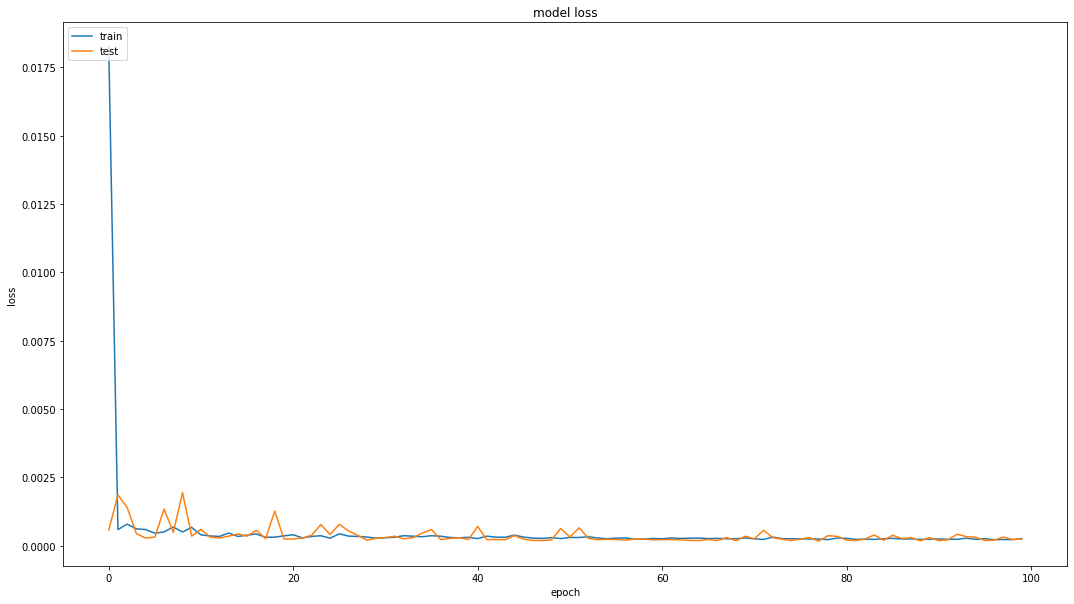

In [105]:
# summarize history for loss
plt.figure(figsize = (18,10))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

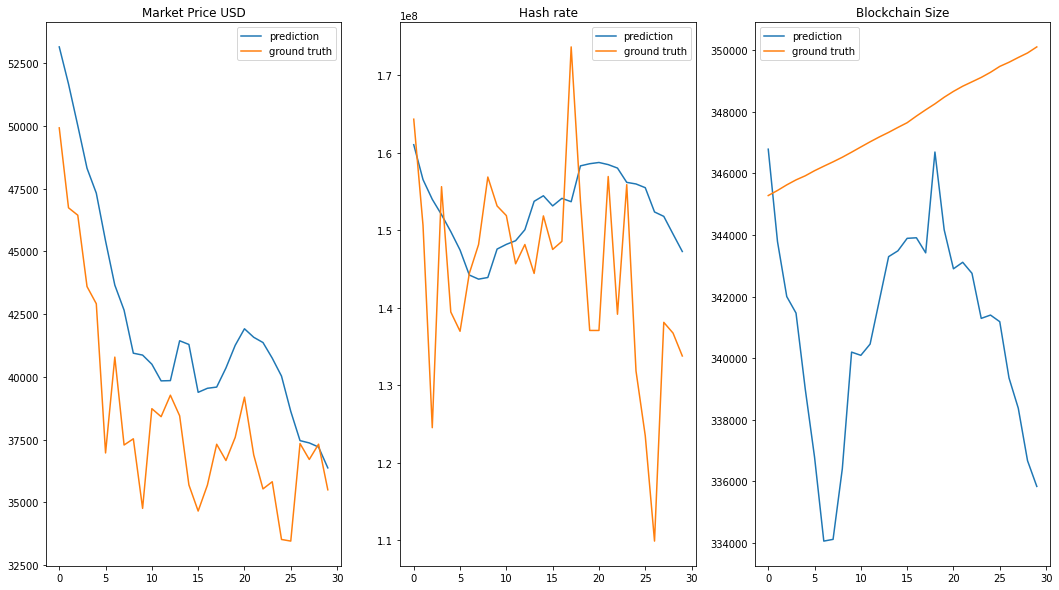

In [107]:
y_hat_p = (y_hat * y_normalization).swapaxes(0,1)
y_test_p = (y_test * y_normalization).swapaxes(0,1) 

fig, axs = plt.subplots(1,y_size, figsize=(18, 10))
for idx, (prediction, ground_truth, label) in enumerate(zip(y_hat_p, y_test_p, columns)):
    axs[idx].plot(prediction, label='prediction')
    axs[idx].plot(ground_truth, label='ground truth')
    axs[idx].set_title(label)
    axs[idx].legend()

plt.show()  

# Multivariate multi step MLP prediction with history
Final evolution of this method will be adding prediction for K steps in the future.

The goal of this method would be to predict K days for *Market Price USD*, *Hash rate* and *Blockchain Size* based on N historical values.

$[X_{1}, X_{2}...X_{N}]$ -> $[X_{N+1}, X_{N+2}...X_{N+K}]$

where 

$[x_{price}, x_{hash}, x_{blockchain}] \subset X_{N+1}$ and $X_{N} = [x_{1}, x_{2}...x_{15}]$

In [118]:
from sklearn.model_selection import train_test_split

df = btc_data.copy()

columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
columns_idx = [df.columns.get_loc(c) for c in columns if c in df]

HISTORY_LENGTH = 32
PREDICTION_LENGTH = 8
X = df.to_numpy()
print(f'Dataset shape: {X.shape}')

# Data normalization
X_normalization = np.max(X, axis=0)
y_normalization = X_normalization[columns_idx]
X = X/X_normalization

# Split into X and y
X, y = split_sequences(X, HISTORY_LENGTH, PREDICTION_LENGTH)
y = y[:,:,columns_idx]

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((X.shape[0], n_output))

X_size = X.shape[1]
y_size = y.shape[1]

# Set test data as N last days (there is one record per day)
N = 30
X, X_test = X[:-N], X[-N:]
y, y_test = y[:-N], y[-N:]

# Split training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'X train: {X_train.shape}\ny train: {y_train.shape}')
print(f'X val: {X_val.shape}\ny val: {y_val.shape}')
print(f'X test: {X_test.shape}\ny test: {y_test.shape}')

Dataset shape: (4546, 15)
X train: (4028, 480)
y train: (4028, 24)
X val: (448, 480)
y val: (448, 24)
X test: (30, 480)
y test: (30, 24)


In [119]:
model3 = Sequential()
model3.add(Dense(1024, activation='relu', input_dim=n_input))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(n_output))
model3.compile(optimizer='adam', loss='mse')
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              492544    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_17 (Dense)             (None, 24)                6168      
Total params: 761,112
Trainable params: 761,112
Non-trainable params: 0
_________________________________________________________________


In [120]:
history3 = model3.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs=100,
    validation_data=(X_val, y_val),
)

Epoch 1/100
126/126 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 7.8771e-04
Epoch 2/100
126/126 [==============================] - 0s 2ms/step - loss: 7.1514e-04 - val_loss: 5.6567e-04
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 5.7544e-04 - val_loss: 5.8167e-04
Epoch 4/100
126/126 [==============================] - 0s 2ms/step - loss: 6.2707e-04 - val_loss: 5.2367e-04
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 4.8466e-04 - val_loss: 9.7166e-04
Epoch 6/100
126/126 [==============================] - 0s 2ms/step - loss: 5.3325e-04 - val_loss: 5.6514e-04
Epoch 7/100
126/126 [==============================] - 0s 2ms/step - loss: 4.5805e-04 - val_loss: 4.4204e-04
Epoch 8/100
126/126 [==============================] - 0s 2ms/step - loss: 4.5123e-04 - val_loss: 3.8562e-04
Epoch 9/100
126/126 [==============================] - 0s 2ms/step - loss: 4.0820e-04 - val_loss: 6.4326e-04
Epoch 10/100
126/126 [=

In [121]:
y_hat = model3.predict(X_test, verbose=0)

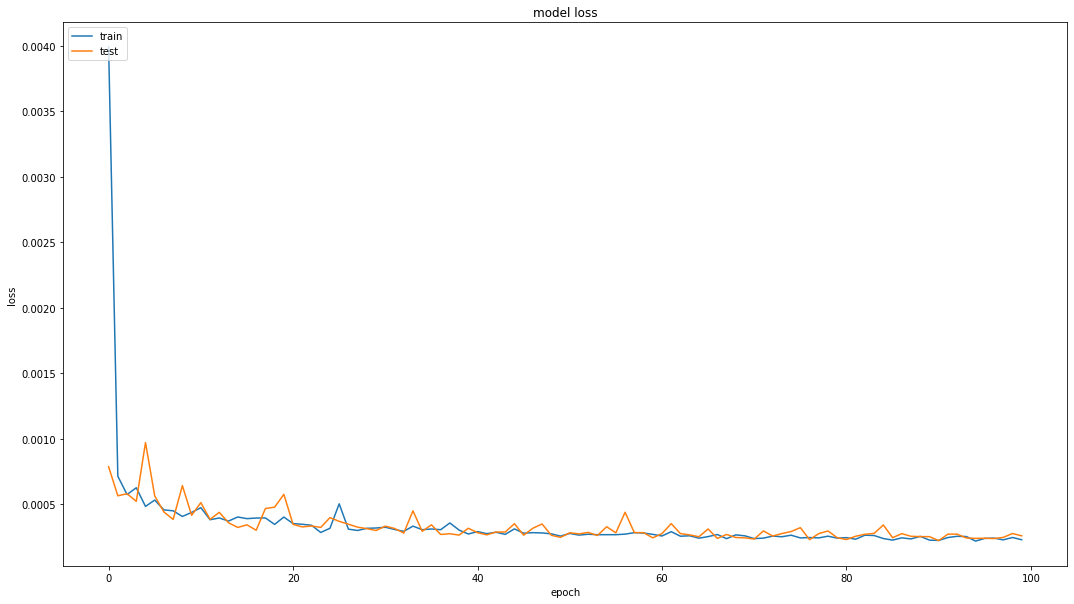

In [122]:
# summarize history for loss
plt.figure(figsize = (18,10))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [123]:
y_hat.reshape(-1, PREDICTION_LENGTH, len(columns)).shape

(30, 8, 3)

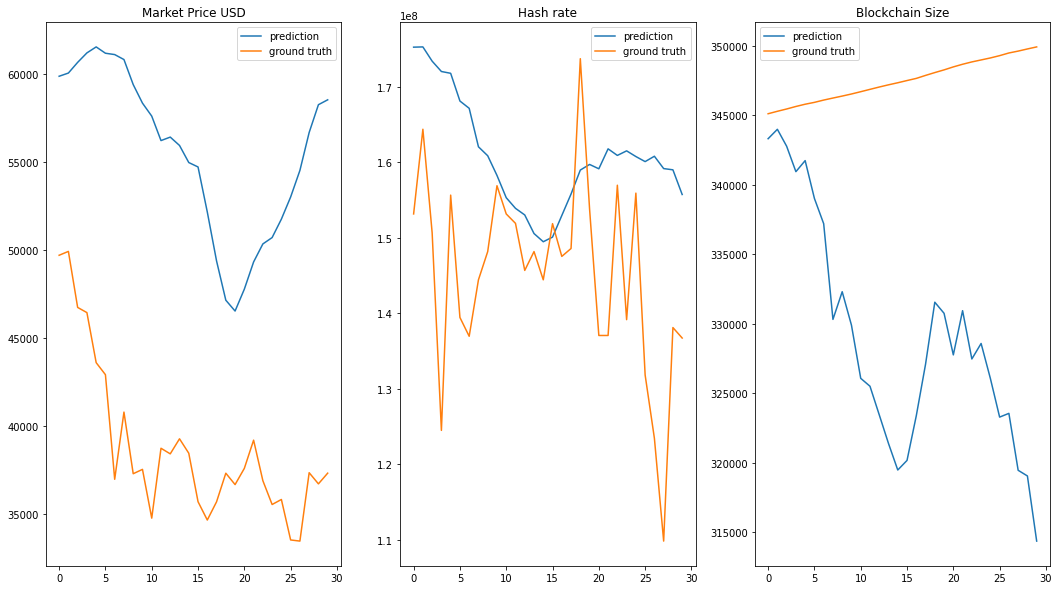

In [125]:
PREDICICTION_DAY = 7

y1 = y_hat.reshape(-1, PREDICTION_LENGTH, len(columns))
y2 = y_test.reshape(-1, PREDICTION_LENGTH, len(columns))

y_hat_p = (y1[:,PREDICICTION_DAY] * y_normalization).swapaxes(0,1)
y_test_p = (y2[:,PREDICICTION_DAY] * y_normalization).swapaxes(0,1)

fig, axs = plt.subplots(1,len(columns), figsize=(18, 10))
for idx, (prediction, ground_truth, label) in enumerate(zip(y_hat_p, y_test_p, columns)):
    axs[idx].plot(prediction, label='prediction')
    axs[idx].plot(ground_truth, label='ground truth')
    axs[idx].set_title(label)
    axs[idx].legend()

plt.show()  

# ARIMA Market Price prediction

In [127]:
#!pip install pmdarima
#from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [130]:
#remove rows with Market price 0
btc_data[btc_data["Market Price USD"]!=0].first_valid_index()
#591 days since start

Timestamp('2010-08-16 00:00:00')

In [131]:
btc_data_ARIMA=btc_data.iloc[591:]
btc_data_ARIMA["Market Price USD stationary"]=btc_data_ARIMA["Market Price USD"]

C:\Users\gasie\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
#P-Value has to be <0.05 for data to be stationary so that ARIMA can be used
def stationarity_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print(" P-Value : ", dftest[1])

In [133]:
stationarity_test(btc_data_ARIMA["Market Price USD stationary"])

 P-Value :  0.6121432459861968


In [134]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

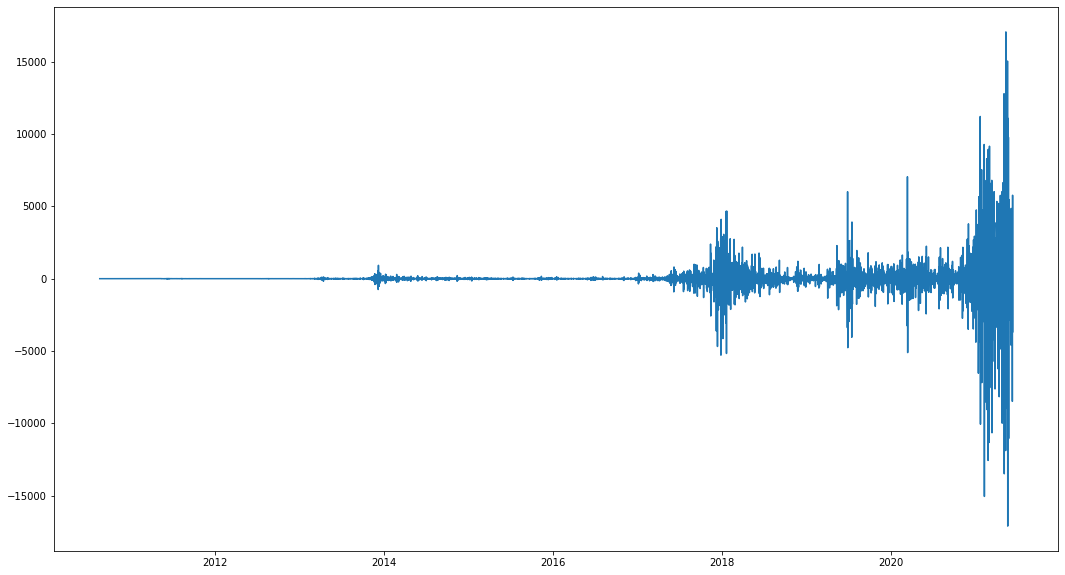

 P-Value :  0.0


In [137]:
temp  = difference(btc_data_ARIMA["Market Price USD stationary"])
btc_data_ARIMA = btc_data_ARIMA.iloc[1:]
btc_data_ARIMA["Market Price USD stationary"]=temp
btc_data_ARIMA.dropna(how='any', inplace=True)
plt.figure(figsize = (18,10))
plt.plot(btc_data_ARIMA["Market Price USD stationary"])
plt.show()
stationarity_test(btc_data_ARIMA["Market Price USD stationary"])

In [138]:
test_days=30
train=btc_data_ARIMA.iloc[:-test_days]

In [149]:
train["Market Price USD stationary"]

2010-08-19       -0.2166
2010-08-20        0.0763
2010-08-21       -0.0123
2010-08-22        0.0101
2010-08-23        0.0012
                 ...    
2021-05-10    -2793.0500
2021-05-11      447.4700
2021-05-12     5012.8800
2021-05-13   -11873.1400
2021-05-14    17047.5000
Name: Market Price USD stationary, Length: 3922, dtype: float64

In [174]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train["Market Price USD stationary"],order=(5,1,0))
model=model.fit(transparams=True)
model.summary()

C:\Users\gasie\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\gasie\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARIMA Model Results                                   
=========================================================================================
Dep. Variable:     D.Market Price USD stationary   No. Observations:                 3921
Model:                            ARIMA(5, 1, 0)   Log Likelihood              -31593.131
Method:                                  css-mle   S.D. of innovations            763.485
Date:                           Tue, 15 Jun 2021   AIC                          63200.262
Time:                                   18:53:17   BIC                          63244.181
Sample:                               08-20-2010   HQIC                         63215.846
                                    - 05-14-2021                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0634      1.393      0.046      0.964      -2.667       2.793
ar.L1.D.Market Price USD stationary    -1.9682      0.015   -133.041      0.000      -1.997      -1.939
ar.L2.D.Market Price USD stationary    -2.2922      0.030    -77.356      0.000      -2.350      -2.234
ar.L3.D.Market Price USD stationary    -1.9078      0.036    -52.863      0.000      -1.979      -1.837
ar.L4.D.Market Price USD stationary    -1.1608      0.030    -38.951      0.000      -1.219      -1.102
ar.L5.D.Market Price USD stationary    -0.4295      0.015    -28.662      0.000      -0.459      -0.400
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0504           -1.2023j            1.2034           -0.2433
AR.2            0.0504           +1.2023j            1.2034            0.2433
AR.3           -1.1823           -0.0000j            1.1823           -0.5000
AR.4           -0.8105           -0.8384j            1.1661           -0.3723
AR.5           -0.8105           +0.8384j            1.1661            0.3723
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

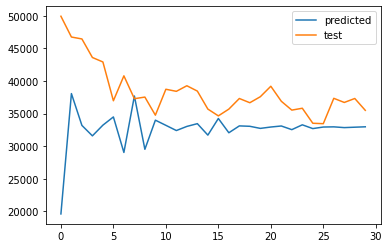

In [175]:
start=len(train)
end=len(train)+test_days-1
pred=model.predict(start=start,end=end).rename('ARIMA Predictions')
start_price=btc_data_ARIMA["Market Price USD"][-31]
predictions=[]
for i in range(len(pred)):
    if i ==0:
        p=start_price+pred[i]
    else:
        p=predictions[-1]+pred[i]
    predictions.append(p)
predictions
pred = pd.Series(predictions)
test=pd.Series(list(btc_data_ARIMA["Market Price USD"][-test_days:]))
pred.plot(legend=True, label='predicted')
test.plot(legend=True, label= 'test')